>Navtej Buttar-202237928

>Shayan Patel-202235392

>Varmisan Thivagharen-202138134

# What are the effects of LSE's large number of international students on the UK's economy?

## Introduction

>The London School of Economics is well known for its diverse, multicultural network of students, with thousands of people from all over the world coming here to study, and being able to interact with so many different people from various backgrounds is something that makes the experience so unique and special. 

>However, could there be a more widespread effect of a large number of international students coming to the UK, specifically relating to the economy. This is something that we wanted to investigate during this report.

>There are many reasons why it could perhaps be good for the economy, such as the fact that international students go on too work in the UK straight after graduating and are instantly contributing the economy wheras, many domestic students may be leaving and not contributing or starting their own firms. We will explore this furthur too see if International students make up a large part of the UK's work force.

>However, there could potentially be some reasons for international students having a negative effect on the economy. With an increasing number of them occupying spots at universities and then moving back to their home countries, they will not be contributing to the UK’s economy.

>We were interested to analyse the exact effects of the increasing number of international students and we will do so in this report.


## Data Aquisition

### Individual Universities

>First of all, we wanted to show that LSE has one of the highest proportions of international students in the UK. We used a webscraping method to obtain data for every university in the UK in 2020. This data was obtained from the following website, https://www.thecompleteuniversityguide.co.uk/student-advice/where-to-study/international-students-at-uk-universities.

>The reason we selected the complete univeristy guide is because it is the most reputable source available and was less likely to be biased when compared to other soucres and has been running since 2007

In [2]:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup

url = "https://www.thecompleteuniversityguide.co.uk/student-advice/where-to-study/international-students-at-uk-universities"
response = requests.get(url)

soup = BeautifulSoup(response.text,'lxml')

section = soup.find_all('td')

university_data = []
percentage = []
percentage_cleaned = []
universities = []

for item in section:
    university_data.append(str(item))



for i in range(len(university_data)):
    percent = university_data[i]
    if i % 2 == 0:
        location = percent.split('"')
        universities.append(location[7].strip(' '))
    else:
        percentage.append(percent[4:7])
       
for value in percentage:
       
    percentage_cleaned.append(float(value.strip('%<')))
    
data_dictionary = {'University': universities, 'Percentage of international students': percentage_cleaned}
percentage_of_international_students = pd.DataFrame.from_dict(data_dictionary)

percentage_of_international_students

,University,Percentage of international students
0,Aberdeen,28.0
1,Abertay,12.0
2,Aberystwyth,18.0
3,AECC University College,36.0
4,Anglia Ruskin,14.0
...,...,...
145,Worcester,8.9
146,Wrexham Glyndwr,3.8
147,Writtle University College,5.9
148,York,14.0


### International Students Data

>We then downloaded data from https://public.tableau.com/app/profile/migobs/viz/InternationalstudentsintheUK2022/2, about the chnages in the proportion of international students in the UK every year since 1994 and loaded it into a dataframe.

>We chose to use data from the whole of the UK as opposed to just LSE, first of all as there was more data availble, but secondly, it is more likely too have an effect on the UK economy.

>We will show later that statistically, LSE has a very high proportion of international students when compared too other universities, so the school is a big part of the increase in international students across the UK.

In [3]:
percentage_international_in_UK = pd.read_csv('Data/UK_proportion_of_international_students.csv')
percentage_international_in_UK

,Year,Percentage of international students UK(%)
0,1994/95,10
1,1995/96,11
2,1996/97,11
3,1997/98,11
4,1998/99,12
5,1999/2000,12
6,2000/01,12
7,2001/02,12
8,2002/03,13
9,2003/04,13


>We then used the following websites, https://www.prosperityforamerica.org/international-students-in-the-us/#:~:text=In%202021%2D22%20there%20are,the%20U.S%20in%202020%2D21, https://educationdata.org/college-enrollment-statistics, to obtain data for total enrollment in the USA and the total number of international students in the USA year by year.

>We had to obatain total enrollment and international enrollment seperately as there was no data on the proportion of international students available for the USA.

In [10]:
USA_total_enrollment = pd.read_csv('Data/USA_total_enrolment.csv')
USA_total_enrollment

,Year,Total Enrollment USA,% Public Institution Enrollment
0,2022,20031000,73.7%
1,2021,20327000,73.7%
2,2020,18991798,73.0%
3,2019,19630178,73.9%
4,2018,19651412,74.0%
5,2017,19778151,73.7%
6,2016,19846904,73.5%
7,2015,19988204,72.9%
8,2014,20209092,72.5%
9,2013,20376677,72.4%


In [11]:
number_of_internationals_in_USA = pd.read_csv('Data/USA_number_of_international_students.csv')
number_of_internationals_in_USA

,Year,Number of International Students in the US
0,2003-04,572509
1,2004-05,565039
2,2005-06,564766
3,2006-07,582984
4,2007-08,623805
5,2008-09,671616
6,2009-10,690923
7,2010-11,723277
8,2011-12,764495
9,2012-13,819644


### LSE Students Data - Domestic and International

> We collected data on Domestic Students and International Students at the LSE. This was collected through the Higher Education Statistics Agency and a csv file was downloaded.

>We filtered the csv files so that we only collected the relevant information and exclude irrelevent infomation such as sex and only include data about the total number of international and domestic students at LSE.

### Domestic Students at LSE from Academic Year 2014/2015 to 2021/2022

In [5]:
Total_2014_2015 = pd.read_csv('Students_Data/Total_Students/Total_2014-2015.csv', skiprows = 15)
Total_2015_2016 = pd.read_csv('Students_Data/Total_Students/Total_2015-2016.csv', skiprows = 15)
Total_2016_2017 = pd.read_csv('Students_Data/Total_Students/Total_2016-2017.csv', skiprows = 15)
Total_2017_2018 = pd.read_csv('Students_Data/Total_Students/Total_2017-2018.csv', skiprows = 15)
Total_2018_2019 = pd.read_csv('Students_Data/Total_Students/Total_2018-2019.csv', skiprows = 15)
Total_2019_2020 = pd.read_csv('Students_Data/Total_Students/Total_2019-2020.csv', skiprows = 15)
Total_2020_2021 = pd.read_csv('Students_Data/Total_Students/Total_2020-2021.csv', skiprows = 15)
Total_2021_2022 = pd.read_csv('Students_Data/Total_Students/Total_2021-2022.csv', skiprows = 15)

Domestic_2014_2015 = Total_2014_2015[['Total UK  ']]
Domestic_2015_2016 = Total_2015_2016[['Total UK  ']]
Domestic_2016_2017 = Total_2016_2017[['Total UK  ']]
Domestic_2017_2018 = Total_2017_2018[['Total UK  ']]
Domestic_2018_2019 = Total_2018_2019[['Total UK  ']]
Domestic_2019_2020 = Total_2019_2020[['Total UK  ']]
Domestic_2020_2021 = Total_2020_2021[['Total UK  ']]
Domestic_2021_2022 = Total_2021_2022[['Total UK  ']]

Total_UK = pd.concat([Domestic_2014_2015, Domestic_2015_2016,Domestic_2016_2017,Domestic_2017_2018,Domestic_2018_2019,Domestic_2019_2020,Domestic_2020_2021,Domestic_2021_2022], axis=0)
Total_UK['Total UK  '] = Total_UK['Total UK  '].str.replace(',', '').astype(int)
Total_UK = Total_UK.reset_index()
Total_UK.drop('index', axis = 1, inplace = True)
Total_UK

,Total UK
0,3545
1,3520
2,3665
3,3740
4,3855
5,3885
6,4430
7,4455


### International Students at LSE

In [6]:
import pandas as pd

intl_df = pd.read_csv('Students_Data/Total_Students/Total_International.csv', skiprows=15)
intl_df.drop('Unnamed: 2', axis = 1, inplace = True)
intl_df['Total International Students'] = intl_df['Total International Students'].astype(int)
intl_df

,Year,Total International Students
0,2014-2015,7055
1,2015-2016,6920
2,2016-2017,7545
3,2017-2018,7885
4,2018-2019,8000
5,2019-2020,8170
6,2020-2021,9030
7,2021-2022,8520


### UK and USA GDP data

>We then used https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/ihyp/pn2 and https://www.macrotrends.net/countries/USA/united-states/gdp-growth-rate to download data about GDP in the UK and USA year by year respectively.

>We chose these websites as they streched back over a long period of time giving us a lot of data too analyse.

In [12]:
UK_GDP_growth = pd.read_csv('Data/GDP_UK.csv')
UK_GDP_growth

,Year,GDP growth UK(%)
0,1949,3.4
1,1950,3.4
2,1951,3.7
3,1952,1.5
4,1953,5.4
...,...,...
69,2018,1.7
70,2019,1.6
71,2020,-11.0
72,2021,7.6


In [13]:
USA_GDP_growth = pd.read_csv('Data/USA_GDP.csv')
USA_GDP_growth

,Year,GDP Growth USA(%),Annual Change
0,2021,5.95%,8.71%
1,2020,-2.77%,-5.06%
2,2019,2.29%,0.65%
3,2018,2.95%,0.70%
4,2017,2.24%,0.7%
5,2016,1.67%,-1.4%
6,2015,2.71%,0.42
7,2014,2.29%,0.45%
8,2013,1.84%,-0.44%
9,2012,2.28%,0.73%


### Data on London's Economy

>We though it would be more appropriate to look at how LSE students contribuyted to Londons economy as opposed too the UK economy as it is unlikely that LSE has a national effect but may effect the economy of the city.

>Therefore we donwloladed and looked at data from the London economy streching back too 1999.

In [9]:
London_Economy = pd.read_csv('Data/GLA-london-economic-outlook-2022-12.csv')
London_Economy.head(1)

,Growth Rates,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
0,"Gross value added at basic prices, 2019 KP, £bn",3.5,7.0,1.1,1.5,4.0,3.3,5.6,3.6,7.3,...,398.9,411.1,427.7,437.0,457.0,463.9,475.4,482.9,423.3,458.5


### Graduate Outcomes - Non-UK and UK Domiciled Graduates

>We wanted too look at the comparative contributions between International and Domestic students at LSE. We did this by comparing weather or not domestic and International students went onto full time employment after graduating too analyse their contributions to the economy.

In [31]:
graduate_nonuk_2018_2019 = pd.read_csv('Students_Data/Graduate Outcomes/GO_NonUK_2018-2019.csv', skiprows = 16)
graduate_nonuk_2019_2020 = pd.read_csv('Students_Data/Graduate Outcomes/GO_NonUK_2019-2020.csv', skiprows = 16)

date_df = pd.DataFrame(
    {
        'Year':['2018-2019','2019-2020']
        
    }
)


graduate_nonuk = pd.concat([graduate_nonuk_2018_2019, graduate_nonuk_2019_2020, ], axis = 0)


graduate_nonuk = graduate_nonuk.reset_index(drop=True)

graduate_non_uk = pd.concat([date_df, graduate_nonuk], axis = 1)
graduate_non_uk

,Year,UKPRN,Provider Name,Full-time employment,Part-time employment,Unknown pattern of employment,Voluntary or unpaid work,Employmentand further study,Full-time further study,Part-time further study,Unknown pattern of further study,"Other including travel, caring for someone or retired",Unemployed and due to start work,Unemployed and due to start further study,Unemployed,Total with known outcomes,Non-respondents,Total
0,2018-2019,10004063,London School of Economics and Political Science,"1,515",80,20,35,220,165,5,0,90,20,5,75,"2,225","2,685","4,910"
1,2019-2020,10004063,London School of Economics and Political Science,"1,635",105,15,30,235,185,10,0,85,25,5,85,"2,420","2,470","4,890"


In [30]:
graduate_uk_2018_2019 = pd.read_csv('Students_Data/Graduate Outcomes/GO_UK_2018-2019.csv', skiprows = 16)
graduate_uk_2019_2020 = pd.read_csv('Students_Data/Graduate Outcomes/GO_UK_2019-2020.csv', skiprows = 16)

graduate_uk = pd.concat([graduate_uk_2018_2019, graduate_uk_2019_2020, ], axis = 0)


graduate_uk = graduate_uk.reset_index(drop=True)
graduate_uk = pd.concat([date_df, graduate_uk], axis = 1)

graduate_uk

,Year,UKPRN,Provider Name,Full-time employment,Part-time employment,Unknown pattern of employment,Voluntary or unpaid work,Employmentand further study,Full-time further study,Part-time further study,Unknown pattern of further study,"Other including travel, caring for someone or retired",Unemployed and due to start work,Unemployed and due to start further study,Unemployed,Total with known outcomes,Non-respondents,Total
0,2018-2019,10004063,London School of Economics and Political Science,690,45,0,10,100,65,5,0,40,5,0,25,"1,000",650,"1,650"
1,2019-2020,10004063,London School of Economics and Political Science,710,50,10,15,95,75,5,0,30,10,0,35,"1,035",655,"1,690"


## Data Cleaning

In [7]:
percentage_of_international_students = percentage_of_international_students.sort_values('Percentage of international students', ascending = False)
percentage_of_international_students_top_5 = percentage_of_international_students.head(5)
percentage_of_international_students_top_5

,University,Percentage of international students
77,London School of Economics,54.0
134,University College London,54.0
59,Imperial College London,49.0
137,"University of the Arts, London",47.0
107,Royal College of Music,45.0


>The following section shows how we restructured the dataframes too allow us too plot the GDP against the proportion of international students.

In [14]:
percentage_international_in_UK['Year'] = percentage_international_in_UK['Year'].astype(str)
percentage_international_in_UK['Year'] = percentage_international_in_UK['Year'].str[0:4]
percentage_international_in_UK['Year'] = percentage_international_in_UK['Year'].astype(int)
percentage_international_in_UK

,Year,Percentage of international students UK(%)
0,1994,10
1,1995,11
2,1996,11
3,1997,11
4,1998,12
5,1999,12
6,2000,12
7,2001,12
8,2002,13
9,2003,13


>We merge together both of the UK dataframes to get Percentage of international students in the UK and UK GDP growth in the same dataframe so we can plot them.

In [15]:
UK = pd.merge(percentage_international_in_UK, UK_GDP_growth, how='inner', on='Year')
UK

,Year,Percentage of international students UK(%),GDP growth UK(%)
0,1994,10,3.5
1,1995,11,2.1
2,1996,11,1.9
3,1997,11,4.5
4,1998,12,3.2
5,1999,12,3.0
6,2000,12,4.1
7,2001,12,2.2
8,2002,13,1.8
9,2003,13,3.1


>We do the same thing for the USA.

In [16]:
number_of_internationals_in_USA['Year'] = number_of_internationals_in_USA['Year'].astype(str)
number_of_internationals_in_USA['Year'] = number_of_internationals_in_USA['Year'].str[0:4]
number_of_internationals_in_USA['Year'] = number_of_internationals_in_USA['Year'].astype(int)
number_of_internationals_in_USA

,Year,Number of International Students in the US
0,2003,572509
1,2004,565039
2,2005,564766
3,2006,582984
4,2007,623805
5,2008,671616
6,2009,690923
7,2010,723277
8,2011,764495
9,2012,819644


>We use a smiliar approach to obtain a similar dataframe here for the USA but we now have two seperate columns for total enrollment and international student enrollment so we divide the number of internationals by the total to obtain the proportion of internationals for each year.

In [17]:
USA = pd.merge(USA_total_enrollment, number_of_internationals_in_USA, how='inner', on='Year')
USA['Proportion of international students(%)'] = (USA['Number of International Students in the US']/USA['Total Enrollment USA']) * 100
USA = pd.merge(USA, USA_GDP_growth, how='inner', on='Year')
USA = USA.drop(['Total Enrollment USA', 'Number of International Students in the US', 'Annual Change'], axis = 1)
USA['GDP Growth USA(%)'] = USA['GDP Growth USA(%)'].str[0:4]
USA['GDP Growth USA(%)'] = USA['GDP Growth USA(%)'].astype(float)
USA

,Year,% Public Institution Enrollment,Proportion of international students(%),GDP Growth USA(%)
0,2021,73.7%,4.666301,5.95
1,2020,73.0%,4.813104,-2.70
2,2019,73.9%,5.478789,2.29
3,2018,74.0%,5.573640,2.95
4,2017,73.7%,5.535361,2.24
5,2016,73.5%,5.435719,1.67
6,2015,72.9%,5.222275,2.71
7,2014,72.5%,4.824195,2.29
8,2013,72.4%,4.348364,1.84
9,2012,72.1%,3.970282,2.28


### Complete DataFrame of LSE's International and Domestic Students

>We created a complete dataframe that has both international students and domestic students and the total. As done before, the astype of all the column values are integers so now we can work with this data on graphs.

In [15]:
df_lse = pd.concat([intl_df, Total_UK], axis = 1)
df_lse = df_lse.rename(columns={'Total UK  ': 'Total Domestic Students'})
df_lse['Total Students'] = df_lse['Total International Students'] + df_lse['Total Domestic Students']
df_lse

,Year,Total International Students,Total Domestic Students,Total Students
0,2014-2015,7055,3545,10600
1,2015-2016,6920,3520,10440
2,2016-2017,7545,3665,11210
3,2017-2018,7885,3740,11625
4,2018-2019,8000,3855,11855
5,2019-2020,8170,3885,12055
6,2020-2021,9030,4430,13460
7,2021-2022,8520,4455,12975


### Data Cleaning of London DataFrame

In [16]:
London_Economy_2 = London_Economy.iloc[:, 16:24]
London_Economy_2 = London_Economy_2.transpose()
London_Economy_2 = London_Economy_2.rename(columns={0: 'London Economy % change'})
London_Economy_2['London Economy % change'] = London_Economy_2['London Economy % change'].astype(int)
London_Economy_Filtered = London_Economy_2['London Economy % change'].copy()
London_Economy_Filtered = London_Economy_Filtered.reset_index()

### Combining Students with GDP Growth of UK and London

As we only have data of the proportion of LSE students from Academic Years 2014/2015 to 2021/2022, i will be visualise it below using various methods including line graphs, scatter plot or bar chart and combining these. Also, if i see any outliers, i will attempt to clean the data so that there is no signficant effect on our visualisation and analysis. I will also be adding a proportion column. 

In [17]:
UK_GDP_growth_custom = UK_GDP_growth.loc[66:73]
UK_GDP_growth_custom_1 = UK_GDP_growth_custom.copy()
UK_GDP_growth_custom_1.drop('Year', axis = 1, inplace = True)
UK_GDP_growth_custom_1 = UK_GDP_growth_custom_1.reset_index(drop = True)

df_gdp_lse_students = pd.concat([df_lse, UK_GDP_growth_custom_1, London_Economy_Filtered], axis = 1)

df_gdp_lse_students['International Proportion'] = df_gdp_lse_students['Total International Students'] / df_gdp_lse_students['Total Students']
df_gdp_lse_students

,Year,Total International Students,Total Domestic Students,Total Students,GDP growth UK(%),index,London Economy % change,International Proportion
0,2014-2015,7055,3545,10600,2.4,2014,4,0.665566
1,2015-2016,6920,3520,10440,2.2,2015,2,0.662835
2,2016-2017,7545,3665,11210,2.4,2016,4,0.673060
3,2017-2018,7885,3740,11625,1.7,2017,1,0.678280
4,2018-2019,8000,3855,11855,1.6,2018,2,0.674821
5,2019-2020,8170,3885,12055,-11.0,2019,1,0.677727
6,2020-2021,9030,4430,13460,7.6,2020,-12,0.670877
7,2021-2022,8520,4455,12975,4.0,2021,8,0.656647


As this data frame is small, i need to clean data that are outliers. From 2019-2020, there was a -11 percent GDP change and this was caused by the coronavirus pandemic. Therefore, we need to remove this as this is not impacted by students from the UK.

In [18]:
df_gdp_lse_students_cleaned = df_gdp_lse_students.drop([5,6,7], axis = 0, inplace = False)
df_gdp_lse_students_cleaned

,Year,Total International Students,Total Domestic Students,Total Students,GDP growth UK(%),index,London Economy % change,International Proportion
0,2014-2015,7055,3545,10600,2.4,2014,4,0.665566
1,2015-2016,6920,3520,10440,2.2,2015,2,0.662835
2,2016-2017,7545,3665,11210,2.4,2016,4,0.673060
3,2017-2018,7885,3740,11625,1.7,2017,1,0.678280
4,2018-2019,8000,3855,11855,1.6,2018,2,0.674821


### Graduate Outcomes Data Cleaning

>We filtered the dataframe on full time employment and known outcomes and then also changing type to int.

In [56]:
graduate_non_uk_filtered = graduate_non_uk.loc[:, ['Year','Full-time employment','Total with known outcomes']]

graduate_non_uk_filtered['Full-time employment'] = graduate_non_uk_filtered['Full-time employment'].str.replace(',', '').astype(int)
graduate_non_uk_filtered['Total with known outcomes'] = graduate_non_uk_filtered['Total with known outcomes'].str.replace(',', '').astype(int)


graduate_uk_filtered = graduate_uk.loc[:, ['Year','Full-time employment','Total with known outcomes']]
graduate_uk_filtered['Total with known outcomes'] = graduate_uk_filtered['Total with known outcomes'].str.replace(',', '').astype(int)


graduate_non_uk_filtered['Percentage_In_Work'] = (graduate_non_uk_filtered['Full-time employment'] / graduate_non_uk_filtered['Total with known outcomes'] )* 100
graduate_uk_filtered['Percentage_In_Work'] = (graduate_uk_filtered['Full-time employment'] / graduate_uk_filtered['Total with known outcomes'] )* 100

graduate_uk_filtered

,Year,Full-time employment,Total with known outcomes,Percentage_In_Work
0,2018-2019,690,1000,69.000000
1,2019-2020,710,1035,68.599034


## Data visualisation

<AxesSubplot:title={'center':'Universities with most international students'}, xlabel='University'>

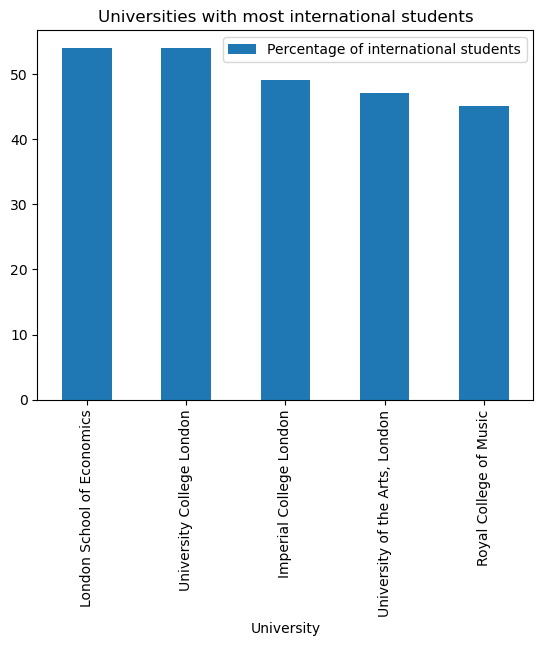

In [19]:
percentage_of_international_students_top_5.plot.bar(x = 'University', title='Universities with most international students')

>We can see above that LSE had the joint top highest proportion of international students in the UK in 2020 at 54%.

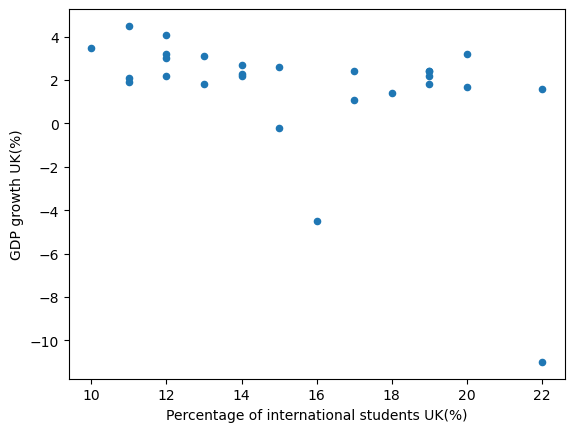

In [27]:
UK.plot.scatter('Percentage of international students UK(%)', 'GDP growth UK(%)');

>We can see above that there appears to be a slight negative correlation between the two varibales, shwoing GDP growth decreasing as the percentage of international students increases. 

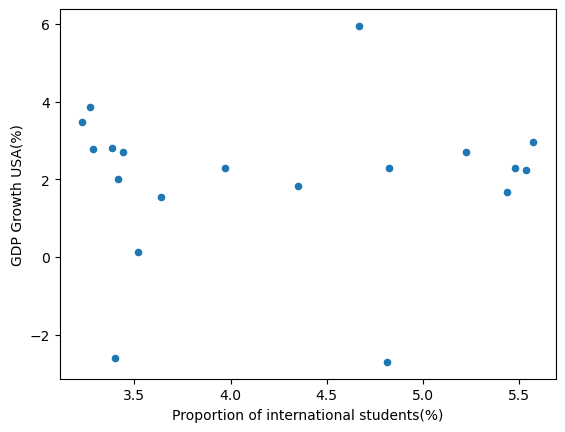

In [21]:
USA.plot.scatter('Proportion of international students(%)', 'GDP Growth USA(%)');

>We can see here that there appears to be less of a correlation between these two variables in the USA. This suggests the possibility of specific policies in the UK on international students or other factors that may be unique to the UK to cause this relationship.

### Visualising Relationship between International Proportion of LSE Students & GDP

>After filtering and cleaning the data from outliers, we can begin visualising specifically the impacts of LSE students on GDP. Although this test may not seem quite relevant, it can show the relationship between top universities and the effects of bachelor students on the wider economy. 

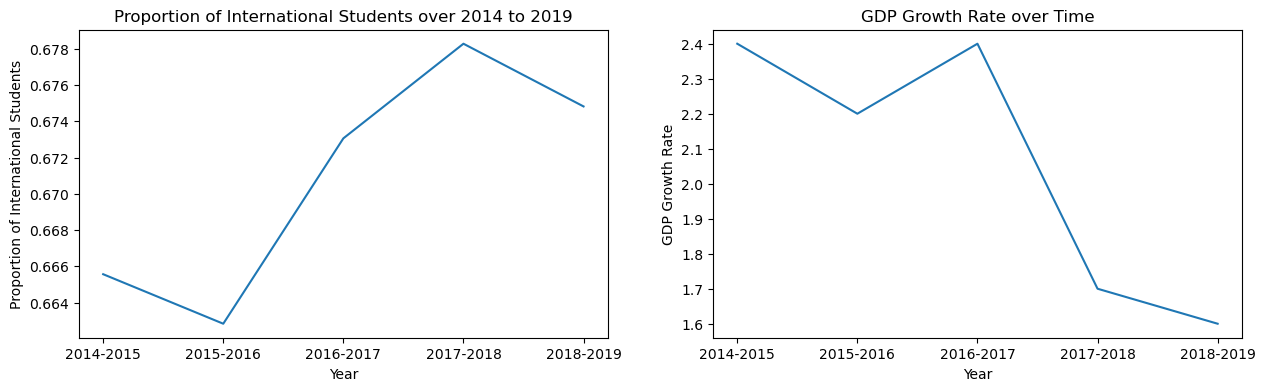

In [23]:
import matplotlib.pyplot as plt

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 4), sharex=True)

ax_1.plot(df_gdp_lse_students_cleaned['Year'], df_gdp_lse_students_cleaned['International Proportion'])
ax_1.set_xlabel('Year')
ax_1.set_ylabel('Proportion of International Students')
ax_1.set_title('Proportion of International Students over 2014 to 2019')

ax_2.plot(df_gdp_lse_students_cleaned['Year'], df_gdp_lse_students_cleaned['GDP growth UK(%)'])
ax_2.set_xlabel('Year')
ax_2.set_ylabel('GDP Growth Rate')
ax_2.set_title('GDP Growth Rate over Time')


plt.show()

>The line graph above shows a insignificant relationship between proportion of LSE students. This could definitely show that LSE international students may not have a significant impact on GDP of the UK.

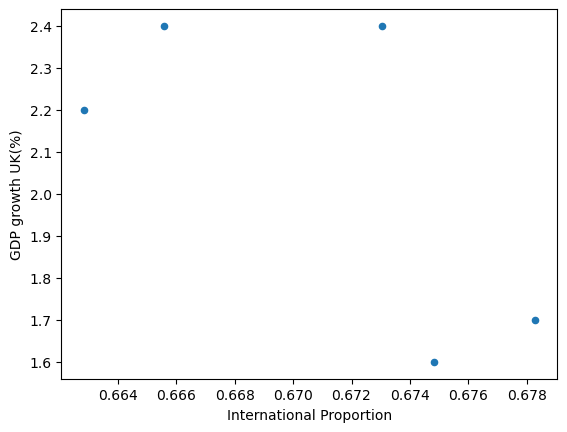

In [24]:
df_gdp_lse_students_cleaned.plot.scatter('International Proportion', 'GDP growth UK(%)');

### Visualising Relationship between International Proportion of LSE Students & GDP of London

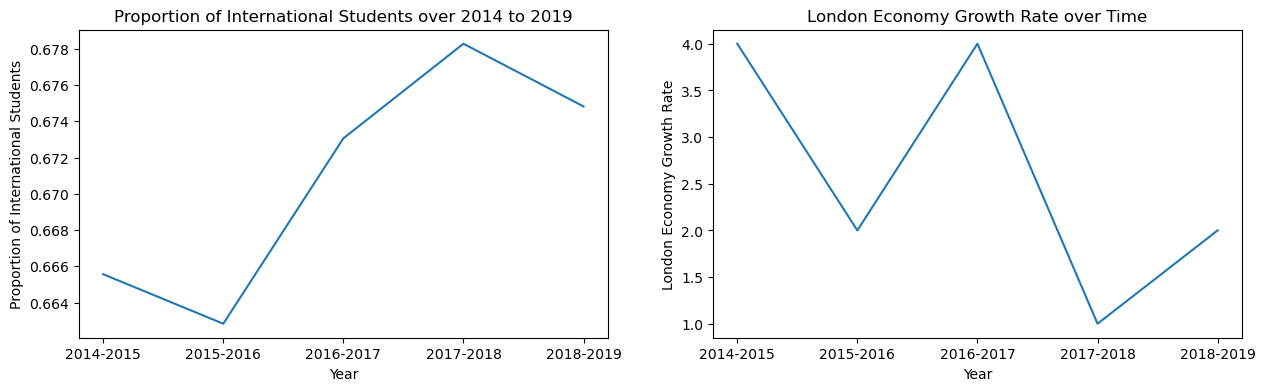

In [25]:
fig, (ax_3, ax_4) = plt.subplots(1, 2, figsize=(15, 4), sharex=True)

ax_3.plot(df_gdp_lse_students_cleaned['Year'], df_gdp_lse_students_cleaned['International Proportion'])
ax_3.set_xlabel('Year')
ax_3.set_ylabel('Proportion of International Students')
ax_3.set_title('Proportion of International Students over 2014 to 2019')

ax_4.plot(df_gdp_lse_students_cleaned['Year'], df_gdp_lse_students_cleaned['London Economy % change'])
ax_4.set_xlabel('Year')
ax_4.set_ylabel('London Economy Growth Rate')
ax_4.set_title('London Economy Growth Rate over Time')


plt.show()

>It is hard to observe weather there is a correlation between these two variables as we were not able to collect enough data, so we were not able to conclude weather the two are correlated or not.

### Graduate Outcomes

Text(0, 0.5, 'Percentage in Work')

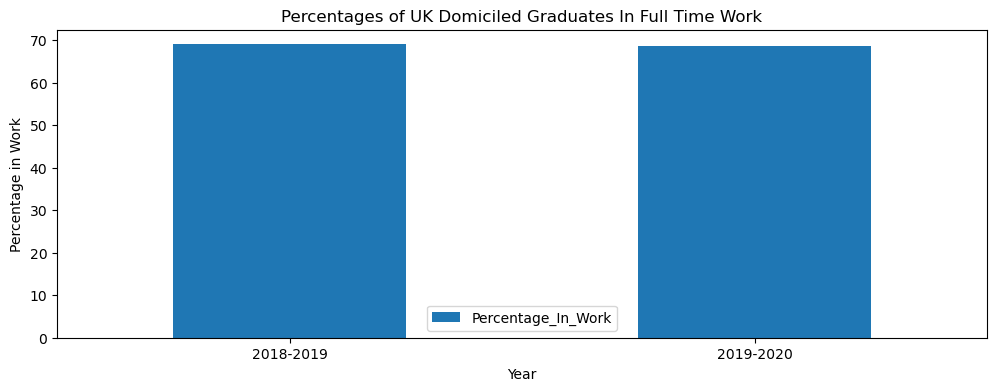

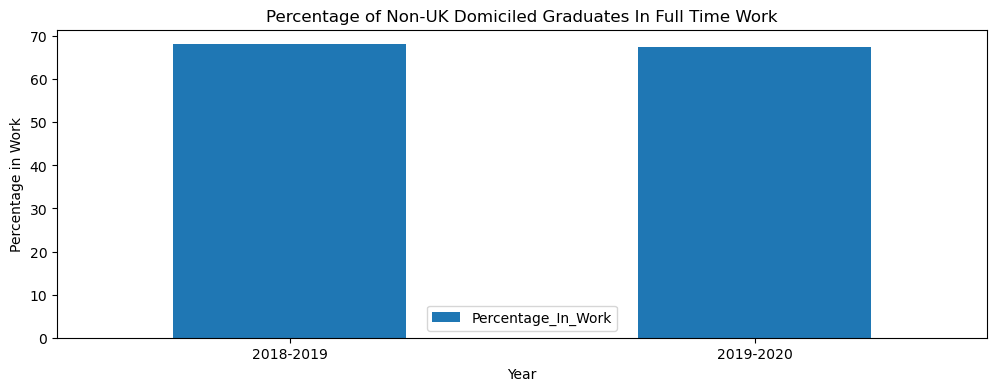

In [31]:
uk_graph = graduate_uk_filtered.pivot_table(index='Year', values='Percentage_In_Work')
non_uk_graph = graduate_non_uk_filtered.pivot_table(index='Year', values='Percentage_In_Work')

uk_graph.plot(kind='bar', figsize=(12, 4), rot=0);
plt.title('Percentages of UK Domiciled Graduates In Full Time Work')
plt.xlabel('Year')
plt.ylabel('Percentage in Work')

non_uk_graph.plot(kind='bar', figsize=(12, 4), rot=0);
plt.title('Percentage of Non-UK Domiciled Graduates In Full Time Work')
plt.xlabel('Year')
plt.ylabel('Percentage in Work')


>We can see that there is a very similar number of international and domestic students going on to work in the UK so they are making similar contributions to the economy. This is therefore not a contributing factor.

## Hypothesis tests

### Is LSE's proportion of international students significantly larger than other Universities in England?

>The following hypothesis test is to determine weather there is a significant difference between the average proportion of international students in England and LSE's proportion of international students.

In [18]:
percentage_of_international_students.describe()

,Percentage of international students
count,150.000000
mean,16.552667
std,11.182229
min,0.600000
25%,7.975000
50%,14.000000
75%,22.000000
max,54.000000


> H0:LSE's proportion of international is not significantly different to the rest of the sample

> H1:LSE has a significantly higher proportion of international students

> √n(x-mean)/SD has t distribution with n-1 degrees freedom.
> In our case, √150(54-16.6)/11.18 = 41.0. We are using the t-distribution with 149 degrees of freedom.

> The probability of getting a value of 41 or higher in this distribtuion is negligible so we can reject H0 at all significance levels. This suggests that LSE does have an significantly larger proportion of international students than other universities

### Is there a correlation between UK GDP growth and the proportion of international students in the UK?

>The following hypothesis test, examines our calculated correlation coefficient to determine weather there is sufficient evidence to suggest a correlation between GDP growth and proportion of international students.

In [19]:
UK.corr()

,Year,Percentage of international students UK(%),GDP growth UK(%)
Year,1.000000,0.983531,-0.431502
Percentage of international students UK(%),0.983531,1.000000,-0.440259
GDP growth UK(%),-0.431502,-0.440259,1.000000


>H0: p=0

>H1: p<0

>p(√(n-2)/(1-pp)) is has a t distribution of n-2 degrees of freedom. p = -0.44 and n = 27

>Therefore we use a distribution with 25 degrees of freedom and our test statistic = -2.45

>The probability of obtaining a value less than -2.45 is 0.01082 so we can reject the null hypothesis at the 5% significance level showing that there is sufficient evidence to sufgest a negative correlation between GDP growth and Percentage of international students in the UK.

>The following two hypothesis tests show that there is strong evidence to suggest LSE does have a much higher proportion of international students than most other universities in England and that there may be some evidence to suggest a negative correlation between GDP growth and the proportion of International students in the UK.

## Conclusion

>So to conclude and answer our question, there is some evidnce to suggest that LSE's high proportion of international students is negatively impacting the economy.

>We were able to see that statistically, there is evidence to suggest LSE does have a much higher proportion of international students than other universities. Furthermore we are also able to visualize the negative correlation between an increase in the proportion of international students and GDP. However, there was no correlation for these same variables in the USA. This suggests that perhaps there is some other factor that is specific to the UK and the international students here which we then wanted to explore by looking at the graduate outcomes. It also wasn't a very strong correlation, the coefficient was only -0.44 so perhaps there are ways in which international students contribute to the economy also meanig the correlation wasn't as strong.

>Looking at the graduate outcomes, we can see that a similar proportion of international students and domestic students stay in the UK and go onto full time work so this does show how international students contribute to the economy, perhaps they do in another way explaining the weak correlation.

>Some limitations of our analysis however, are that for some parts of our analysis we weren't able to collect data over a long enough timeframe, for example, when looking at the proportion of international students in the LSE specifically, we were only able to go back to 2014. If we were able to get hold of more data, it would’ve made our analysis more credible. Also, an increase in international students in one year, may only affect GDP 3 years later when those students graduate, so especially when analysing smaller amounts of data this is something important to consider. We possibly could have compared the proportion of international students to GDP 3 years later, however, this would’ve decreased the amount of data we had by even more. 

>In the future, to continue our analysis we can keep monitoring GDP and the change in the proportion of international students and see if the pattern continues. We could also look more into the graduate outcomes and how long international students stay here in the UK for, perhaps if they decide to stay in the UK, they may only stay here for a short period of time. If this time on average was very short, this may also play an important role in the correlation that we are seeing. Finally, we could have also looked at the different sectors that international students go on to work in, in the UK. There may be evidence for them going into higher paid sectors on average, meaning they are contributing more to the UK’s economy, which may be more evidence for us not obtaining a stronger correlation coefficient between UK GDP and the proportion of international students in the UK.


## References

>London & Partners-https://files.londonandpartners.com/l-and- p/assets/media/students_impact_report.pdf 

>HESA-https://www.hesa.ac.uk/data-and-analysis/students/table-1 

>HESA-https://www.hesa.ac.uk/data-and-analysis/graduates/table-1 